In [270]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os, sys
from os import listdir
import keras
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
import cv2

In [271]:
IMG_SIZE = 224

In [281]:
def hide_patch(image, patch_size, patch_color, patch_position = None):
    
    assert patch_size%2==1, 'patch_size must be an odd number'
    
    hidden = image.copy()
    
    if patch_position is None:
        px = np.random.choice(IMG_SIZE)
        py = np.random.choice(IMG_SIZE)
    else:
        px = patch_position[0]
        py = patch_position[1]
    
    for i in range(px - patch_size//2, px + patch_size//2 + 1):
        for j in range(py - patch_size//2, py + patch_size//2 + 1):
            if i>=0 and i<IMG_SIZE and j>=0 and j<IMG_SIZE:
                hidden[i, j] = patch_color
    
    return hidden, [px, py]

In [282]:
filenames = ['./images/'+f for f in listdir('./images/')]
dataset = list(map( lambda x: cv2.cvtColor(cv2.resize(cv2.imread(x), (IMG_SIZE, IMG_SIZE)),  cv2.COLOR_RGB2BGR),
                   filenames ))
dataset = np.array(dataset)
images_original = tf.convert_to_tensor(dataset)

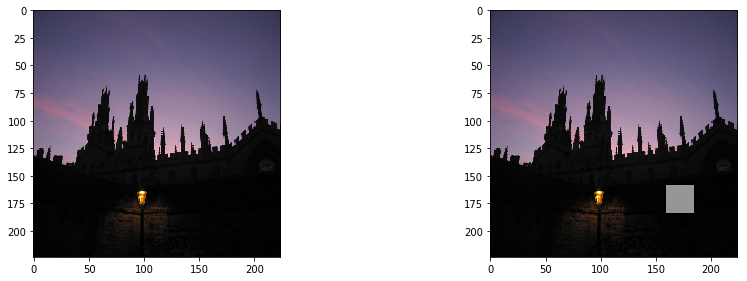

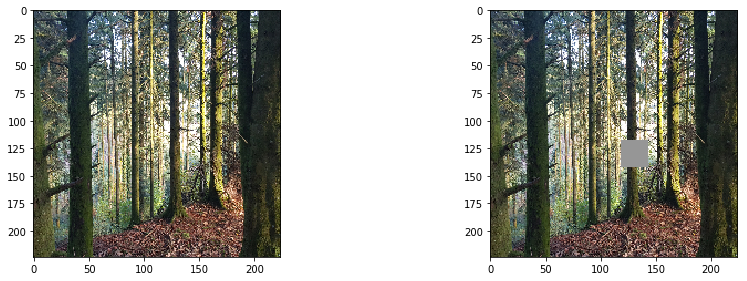

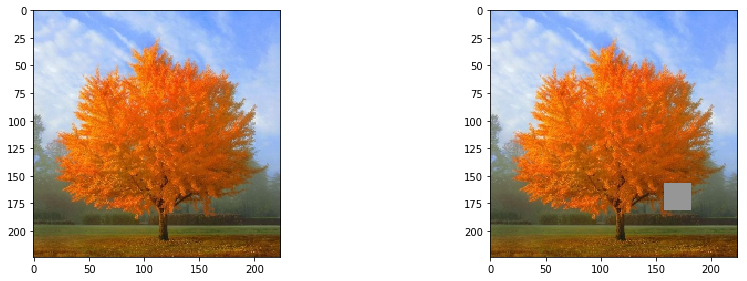

In [292]:
for image in dataset:
    hidden, p = hide_patch(image, 25, [150, 150, 150])
    plt.figure(figsize = (15, 10))

    plt.subplot(221)

    plt.imshow(image)

    plt.subplot(222)
    plt.imshow(hidden)

In [284]:
dataset_hidden = list(map( lambda x: hide_patch(cv2.cvtColor(cv2.resize(cv2.imread(x),
                                                                 (IMG_SIZE, IMG_SIZE)),
                                                      cv2.COLOR_RGB2BGR),
                  25, [150, 150, 150]),
                   filenames ))

pos, img = [], []

for d in dataset_hidden:
    img.append(d[0])
    pos.append(d[1:])
img = np.array(img)
    
images_hidden = tf.convert_to_tensor(img)

Compare predictions

In [285]:
vgg16 = VGG16(include_top=True, weights='imagenet', input_tensor=None,
                               input_shape=None, pooling=None, classes=1000)

In [286]:
res_original = vgg16.predict(images_original, steps = 1)
decode_predictions(res_original, top=5)

[[('n04346328', 'stupa', 0.503751),
  ('n02980441', 'castle', 0.16150382),
  ('n03877845', 'palace', 0.12163646),
  ('n09229709', 'bubble', 0.04392003),
  ('n02782093', 'balloon', 0.02889202)],
 [('n03017168', 'chime', 0.055854894),
  ('n04209239', 'shower_curtain', 0.044606615),
  ('n03743016', 'megalith', 0.04332035),
  ('n04590129', 'window_shade', 0.039236158),
  ('n04326547', 'stone_wall', 0.032812953)],
 [('n09428293', 'seashore', 0.25760496),
  ('n09332890', 'lakeside', 0.24037953),
  ('n09421951', 'sandbar', 0.12439285),
  ('n03388043', 'fountain', 0.059858315),
  ('n04136333', 'sarong', 0.029205125)]]

In [287]:
res_hidden = vgg16.predict(images_hidden, steps = 1)
decode_predictions(res_hidden, top=5)

[[('n02980441', 'castle', 0.5238266),
  ('n04346328', 'stupa', 0.14422841),
  ('n03877845', 'palace', 0.14164059),
  ('n02825657', 'bell_cote', 0.04307173),
  ('n03781244', 'monastery', 0.041192327)],
 [('n03930313', 'picket_fence', 0.12619096),
  ('n04590129', 'window_shade', 0.07405752),
  ('n04209239', 'shower_curtain', 0.06360229),
  ('n03017168', 'chime', 0.061086796),
  ('n03733281', 'maze', 0.03213274)],
 [('n09428293', 'seashore', 0.18228772),
  ('n09332890', 'lakeside', 0.1533704),
  ('n02814860', 'beacon', 0.07843425),
  ('n09421951', 'sandbar', 0.07831444),
  ('n03930313', 'picket_fence', 0.03364108)]]